# IRAT Figures

In [1]:
# basic imports
import os 
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300

def save_fig(filename, AXIS=False):
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    if not AXIS:
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename, dpi=300, bbox_inches = 'tight', pad_inches = 0, transparent=True) 
    return

In [8]:
df1 = pd.read_csv('results/irat_average_qdistances.csv')
df2 = pd.read_csv('results/irat_average_qdistances_current.csv')

# filter by positive average qdistances
df1 = df1[(df1['HA Average Qdistance'] > 0) & (df1['NA Average Qdistance'] > 0)]
df2 = df2[(df2['HA Average Qdistance'] > 0) & (df2['NA Average Qdistance'] > 0)]

## IRAT Prediction at Time of Analysis
- Uses geometric mean of HA and NA average qdistance vs IRAT score

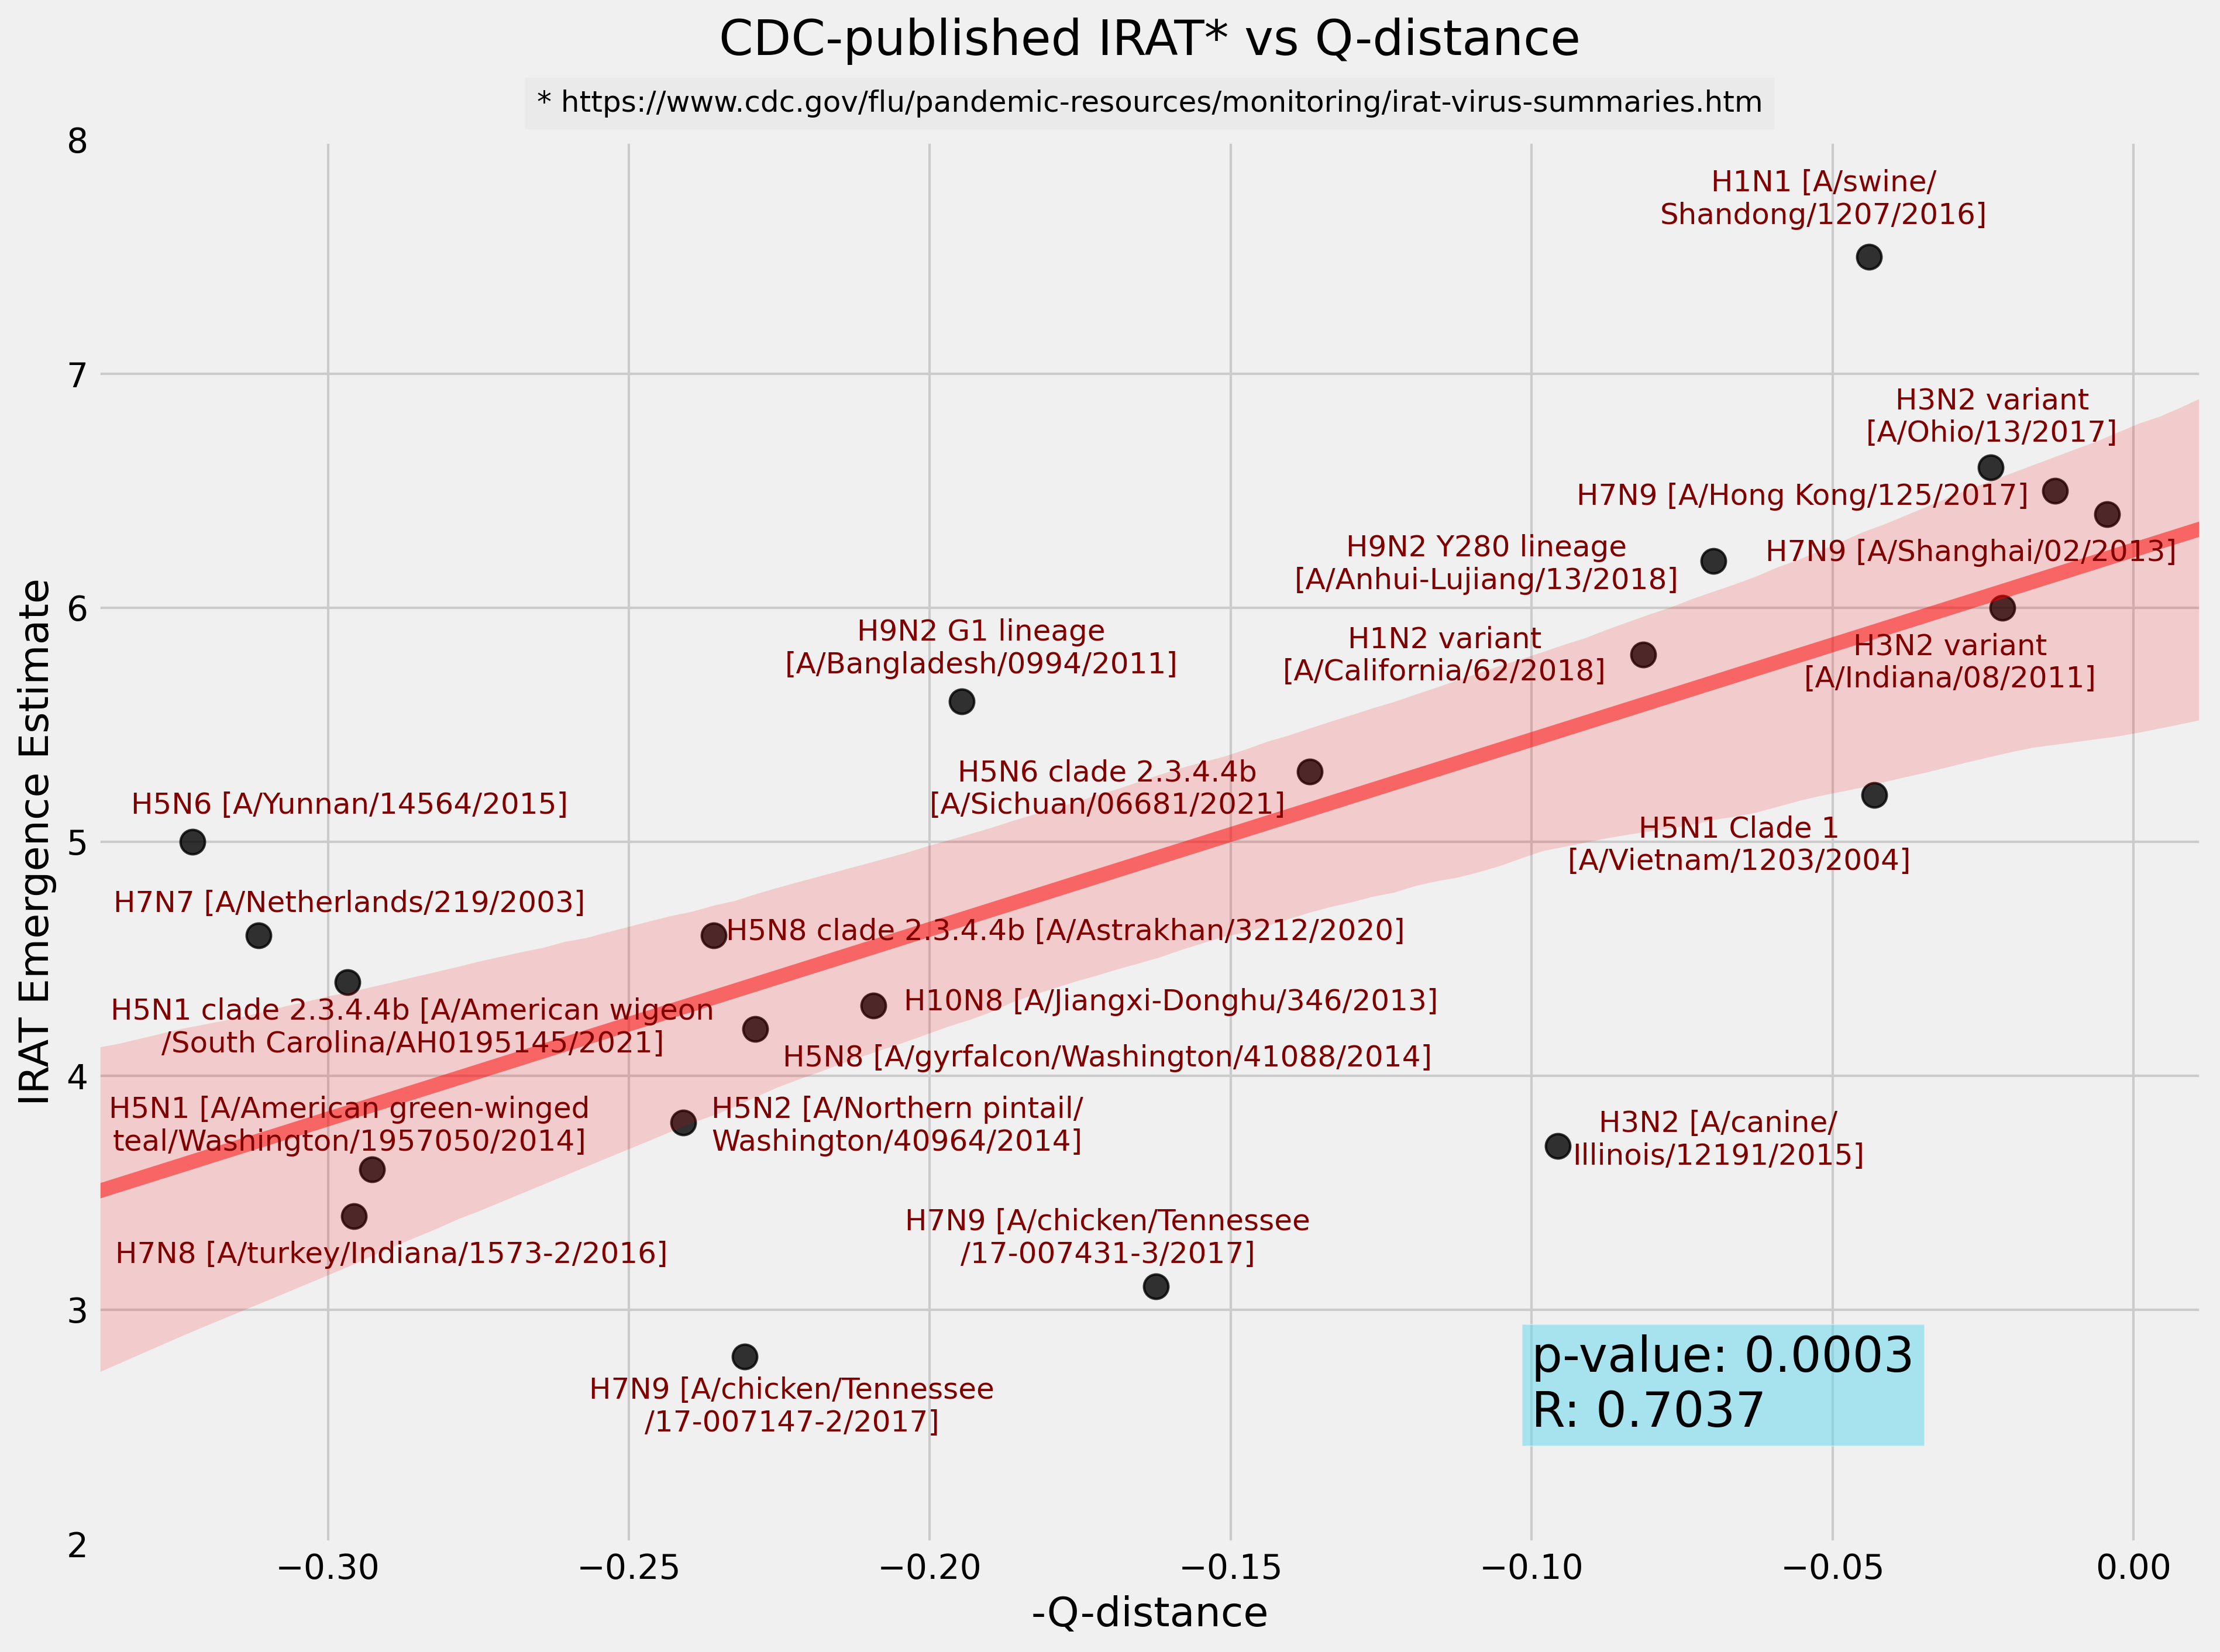

In [11]:
X = df1['Geometric Mean']
Y = df1['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('CDC-published IRAT* vs Q-distance',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.33, 0.08, "H7N9 [A/chicken/Tennessee\n/17-007147-2/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.48, 0.2, "H7N9 [A/chicken/Tennessee\n/17-007431-3/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.14, 0.20, "H7N8 [A/turkey/Indiana/1573-2/2016]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.28, "H5N1 [A/American green-winged\nteal/Washington/1957050/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.77, 0.27, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.38, 0.28, "H5N2 [A/Northern pintail/\nWashington/40964/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.48, 0.34, "H5N8 [A/gyrfalcon/Washington/41088/2014]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.51, 0.38, "H10N8 [A/Jiangxi-Donghu/346/2013]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.15, 0.35, "H5N1 clade 2.3.4.4b [A/American wigeon\n/South Carolina/AH0195145/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.45, "H7N7 [A/Netherlands/219/2003]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.46, 0.43, "H5N8 clade 2.3.4.4b [A/Astrakhan/3212/2020]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.12, 0.52, "H5N6 [A/Yunnan/14564/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.78, 0.48, "H5N1 Clade 1\n[A/Vietnam/1203/2004]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.48, 0.52, "H5N6 clade 2.3.4.4b\n[A/Sichuan/06681/2021]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.42, 0.62, "H9N2 G1 lineage\n[A/Bangladesh/0994/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.64, 0.615, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.88, 0.61, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.66, 0.68, "H9N2 Y280 lineage\n[A/Anhui-Lujiang/13/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.89, 0.7, "H7N9 [A/Shanghai/02/2013]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.81, 0.74, "H7N9 [A/Hong Kong/125/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.9, 0.785, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.82, 0.94, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_qnet',AXIS=True)

In [12]:
coords_df = df1[['Influenza Virus','Virus Type','Geometric Mean','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Geometric Mean'] = coords_df['Geometric Mean']
coords_df

,Influenza Virus,Virus Type,Geometric Mean,Potential Emergence Estimate
21,A/chicken/Tennessee/17-007147-2/2017,H7N9,0.230738,2.8
20,A/chicken/Tennessee/17-007431-3/2017,H7N9,0.162405,3.1
19,A/turkey/Indiana/1573-2/2016,H7N8,0.295696,3.4
18,A/American green-winged teal/Washington/195705...,H5N1,0.292691,3.6
17,A/canine/Illinois/12191/2015,H3N2,0.095664,3.7
16,A/Northern pintail/Washington/40964/2014,H5N2,0.240980,3.8
15,A/gyrfalcon/Washington/41088/2014,H5N8,0.228980,4.2
14,A/Jiangxi-Donghu/346/2013,H10N8,0.209372,4.3
13,A/American wigeon/South Carolina/AH0195145/2021,H5N1,0.296734,4.4
12,A/Netherlands/219/2003,H7N7,0.311533,4.6


## IRAT Prediction at Current Time
- Uses geometric mean of HA and NA average qdistance vs IRAT score

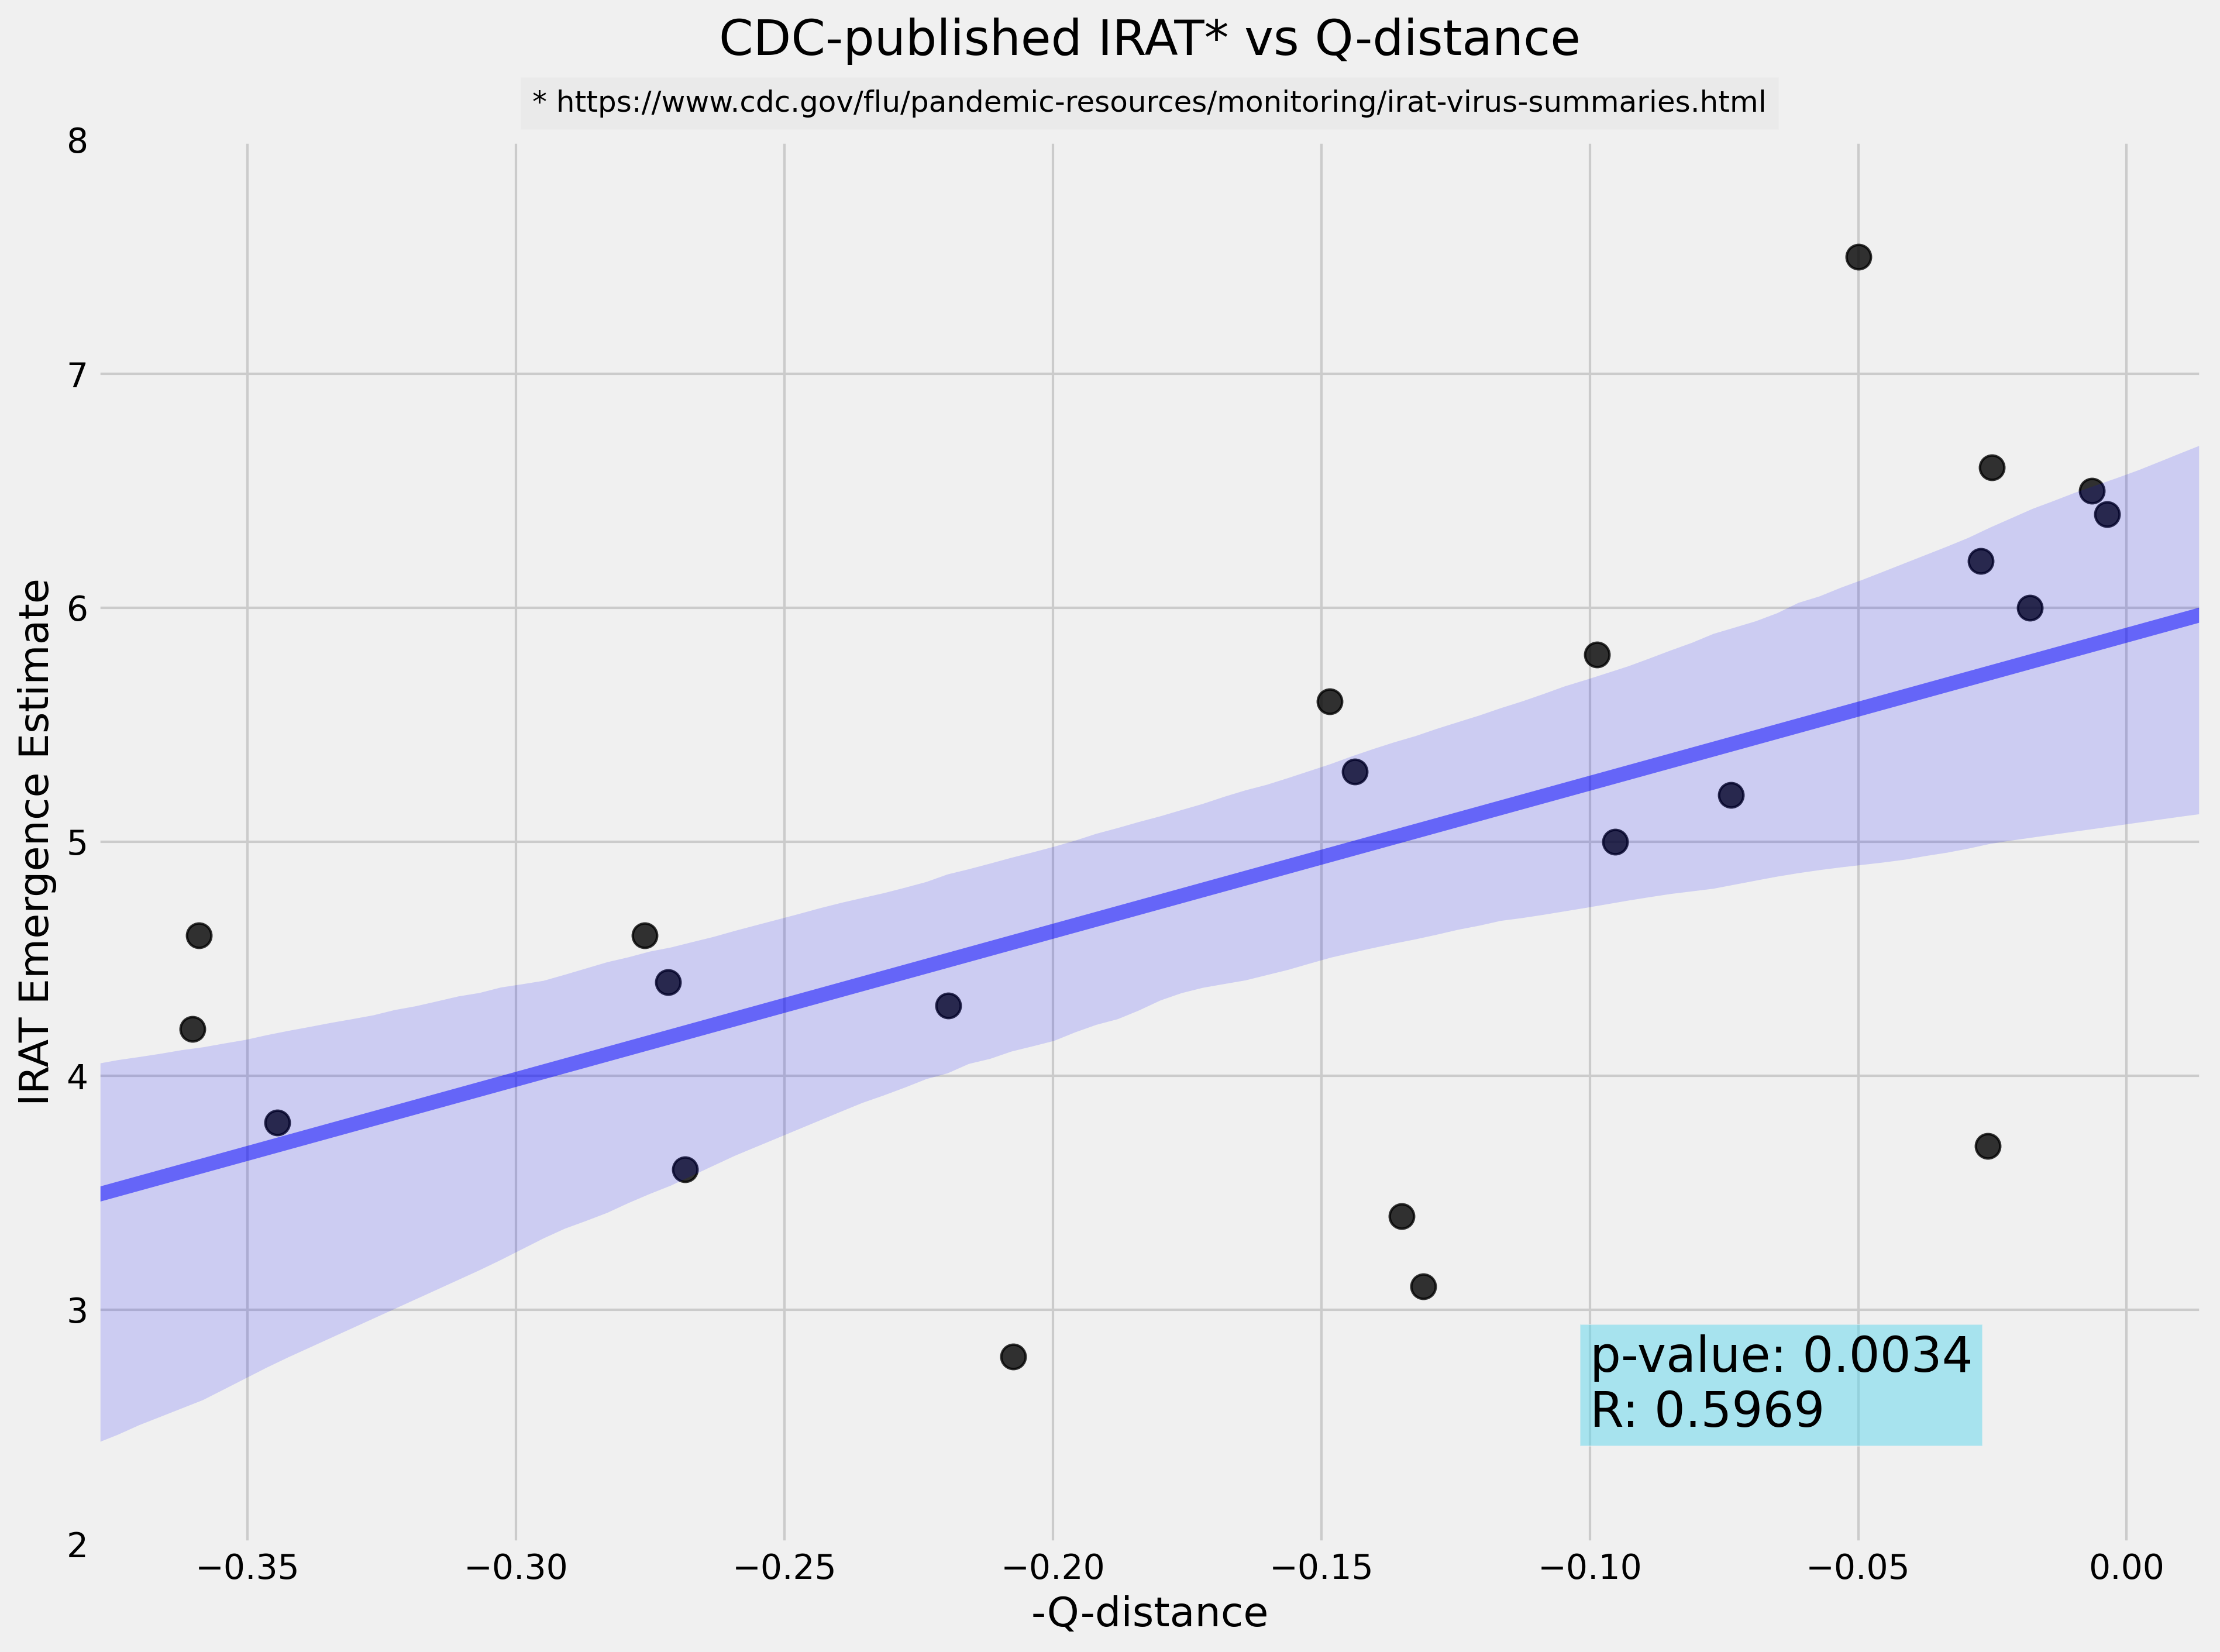

In [13]:
X = df2['Geometric Mean']
Y = df2['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "blue","alpha":.5}, truncate=False)
plt.text(-0.1, 2.5, "p-value: {:5.4f}\nR: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 8)
ax.set_title('CDC-published IRAT* vs Q-distance',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.html", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

save_fig('figures/irat_qnet_current',AXIS=True)

In [14]:
coords_df = df2[['Influenza Virus','Virus Type','Geometric Mean','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Geometric Mean'] = coords_df['Geometric Mean']
coords_df

,Influenza Virus,Virus Type,Geometric Mean,Potential Emergence Estimate
21,A/chicken/Tennessee/17-007147-2/2017,H7N9,0.207456,2.8
20,A/chicken/Tennessee/17-007431-3/2017,H7N9,0.130979,3.1
19,A/turkey/Indiana/1573-2/2016,H7N8,0.135107,3.4
18,A/American green-winged teal/Washington/195705...,H5N1,0.268575,3.6
17,A/canine/Illinois/12191/2015,H3N2,0.025861,3.7
16,A/Northern pintail/Washington/40964/2014,H5N2,0.344453,3.8
15,A/gyrfalcon/Washington/41088/2014,H5N8,0.360284,4.2
14,A/Jiangxi-Donghu/346/2013,H10N8,0.219553,4.3
13,A/American wigeon/South Carolina/AH0195145/2021,H5N1,0.271731,4.4
12,A/Netherlands/219/2003,H7N7,0.276012,4.6


## Comparison: Past vs Current Predictions

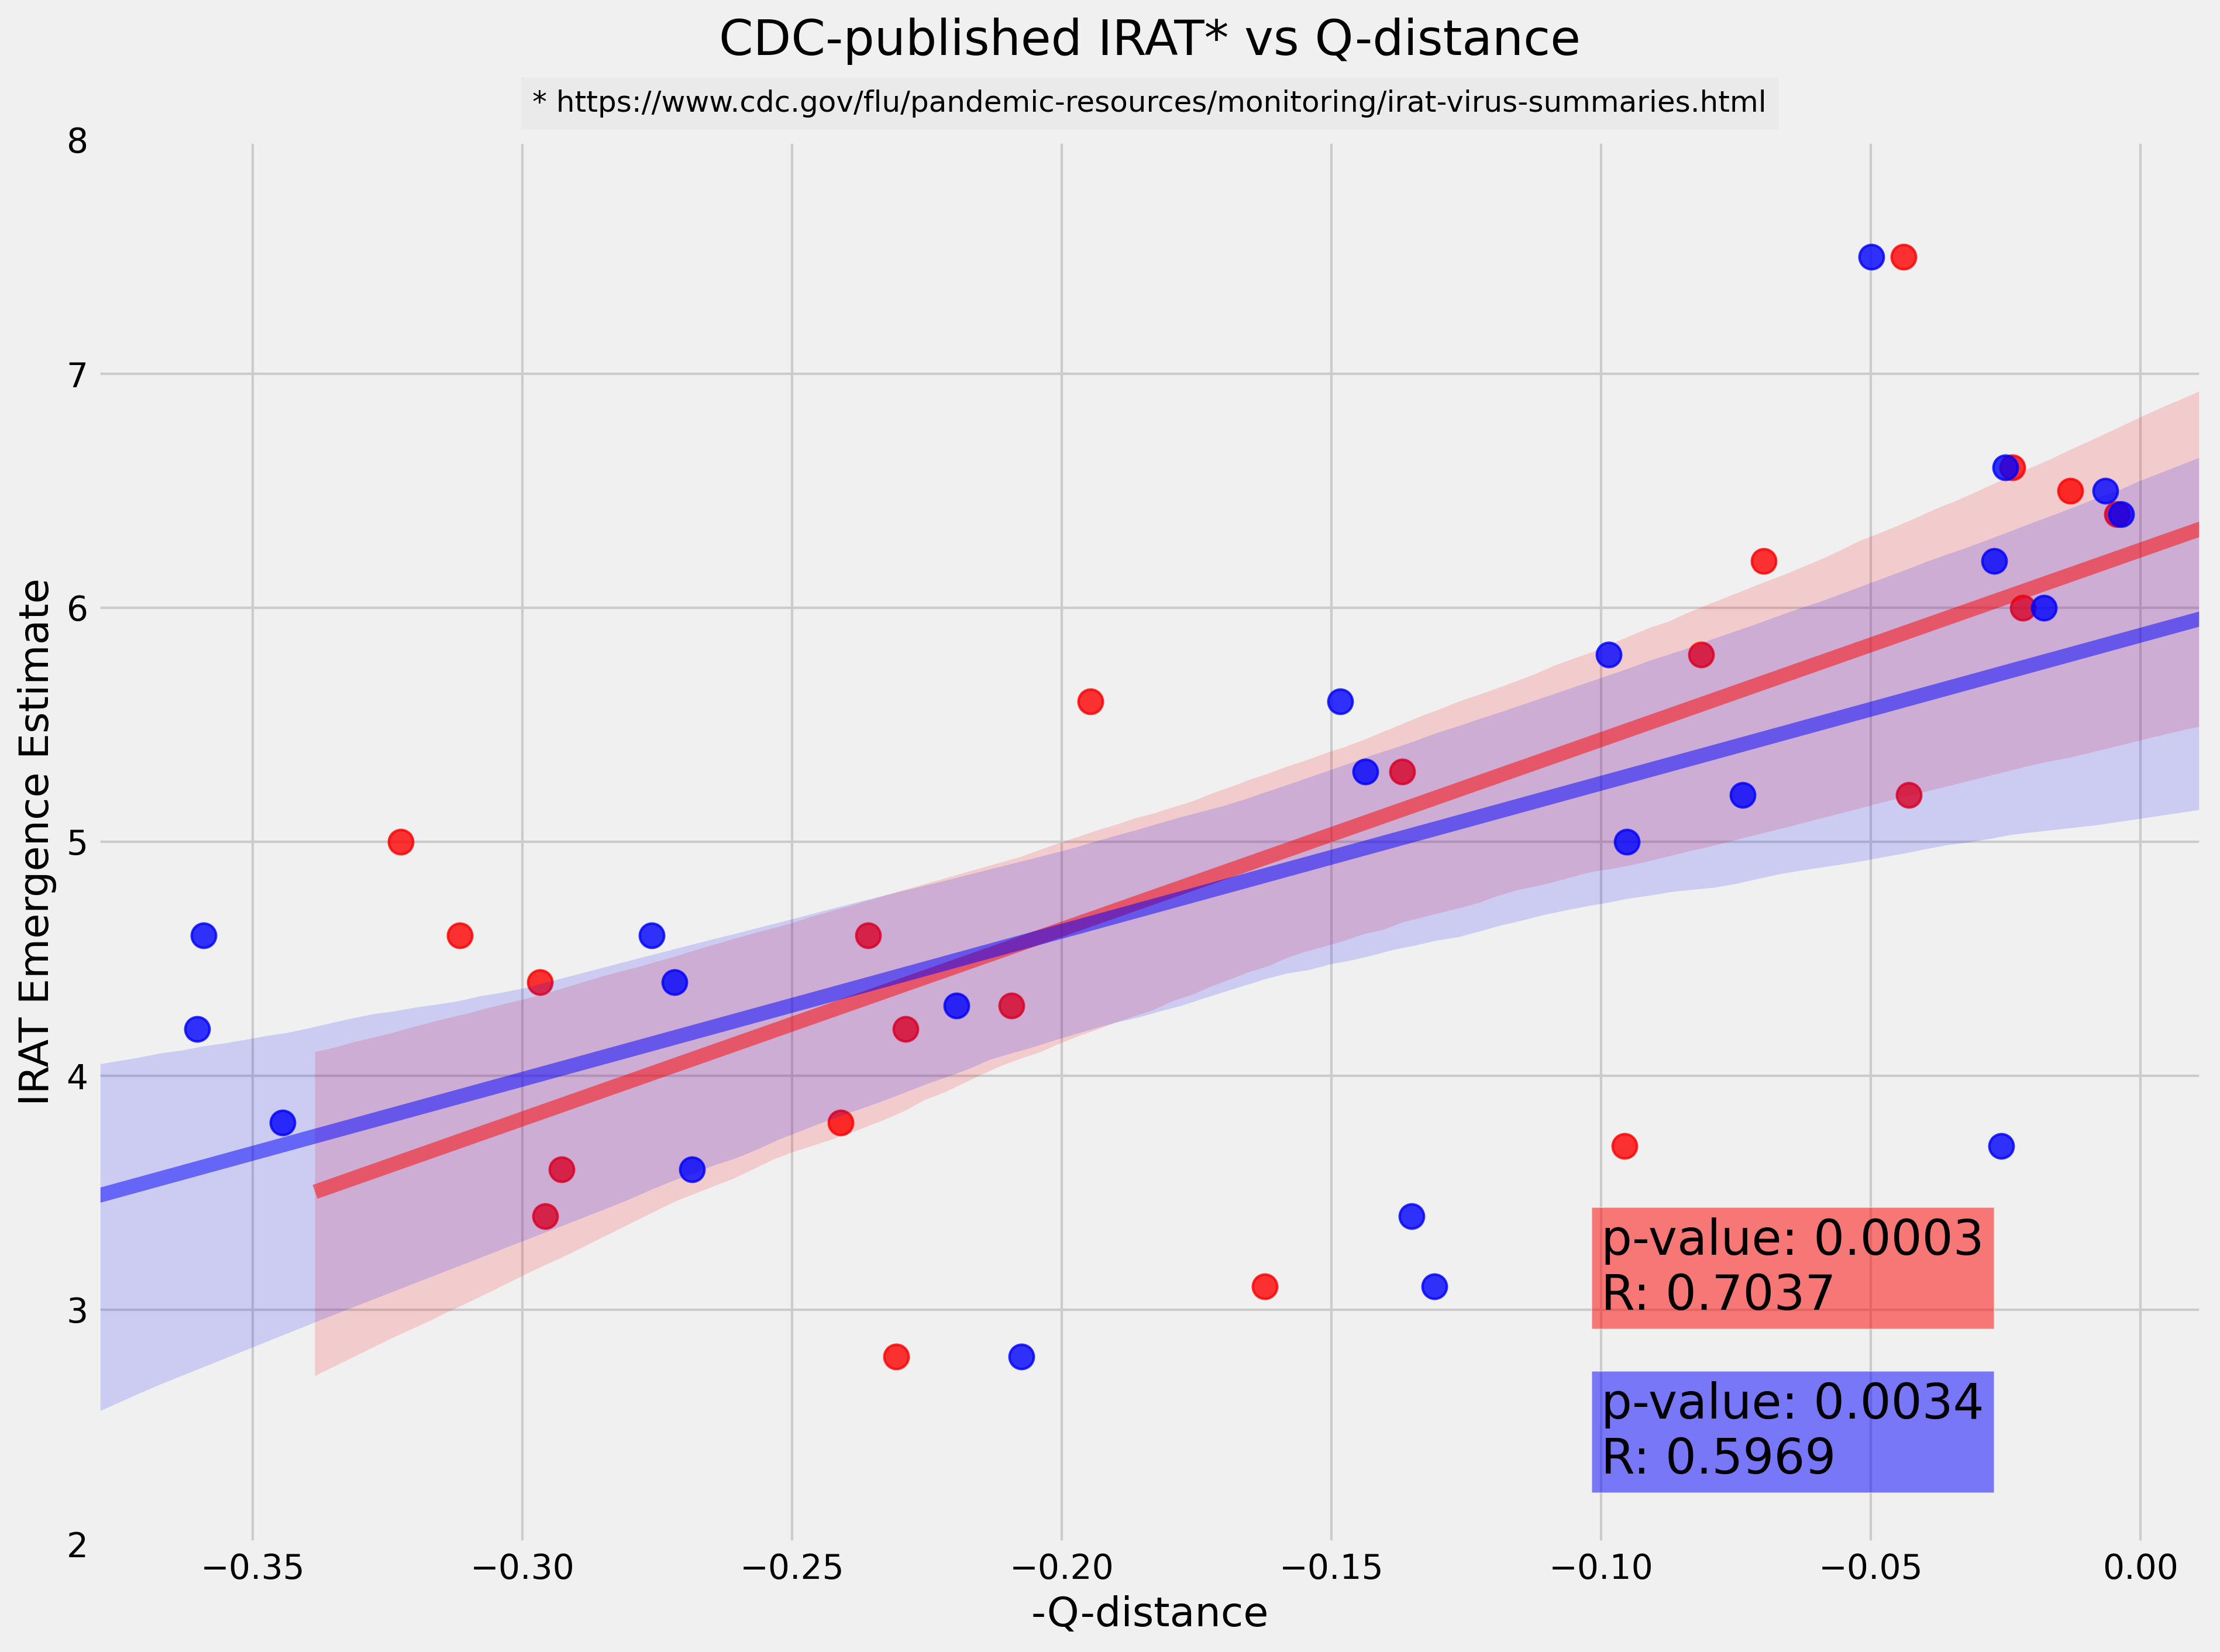

In [15]:
X1 = df1['Geometric Mean']
Y1 = df1['Potential Emergence Estimate']
X2 = df2['Geometric Mean']
Y2 = df2['Potential Emergence Estimate']

slope1, intercept1, r1, p1, std_err1 = stats.linregress(-np.array(X1), Y1)
slope2, intercept2, r2, p2, std_err2 = stats.linregress(-np.array(X2), Y2)

DF1 = pd.DataFrame([-np.array(X1), Y1]).transpose()
DF1.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF1, scatter_kws={"color": "red","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.1, 3, "p-value: {:5.4f}\nR: {:5.4f}".format(p1, r1), bbox=dict(facecolor='red', alpha=0.5), fontsize=20);

DF2 = pd.DataFrame([-np.array(X2), Y2]).transpose()
DF2.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF2, scatter_kws={"color": "blue","s":100}, 
                 line_kws={"color": "blue","alpha":.5}, truncate=False)
plt.text(-0.1, 2.3, "p-value: {:5.4f}\nR: {:5.4f}".format(p2, r2), bbox=dict(facecolor='blue', alpha=0.5), fontsize=20);

plt.ylim(2, 8)
ax.set_title('CDC-published IRAT* vs Q-distance',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.html", 
            ha="center", fontsize=12, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

save_fig('figures/irat_qnet_comparison',AXIS=True)